# PA2 Group 46 
Author: Zhuangzhuang Gong, Richard Hua

# Task 1

## Read data using pandas

In [7]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier


train_data = pd.read_csv('Data/adult_train.csv')
test_data = pd.read_csv('Data/adult_test.csv')

print(test_data)

       age     workclass     education  education-num      marital-status  \
0       25       Private          11th              7       Never-married   
1       38       Private       HS-grad              9  Married-civ-spouse   
2       28     Local-gov    Assoc-acdm             12  Married-civ-spouse   
3       44       Private  Some-college             10  Married-civ-spouse   
4       18             ?  Some-college             10       Never-married   
...    ...           ...           ...            ...                 ...   
16276   39       Private     Bachelors             13            Divorced   
16277   64             ?       HS-grad              9             Widowed   
16278   38       Private     Bachelors             13  Married-civ-spouse   
16279   44       Private     Bachelors             13            Divorced   
16280   35  Self-emp-inc     Bachelors             13  Married-civ-spouse   

              occupation    relationship                race     sex  \
0  

In [8]:
train_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


## Encoding the features as numbers

Split a dataframe into features (X) and target (Y)

In [11]:
n_cols = len(train_data.columns)
Xtrain_dicts = train_data.iloc[:, :n_cols-1].to_dict('records')
Ytrain = train_data.iloc[:, n_cols-1]
Xtest_dicts = test_data.iloc[:, :n_cols-1].to_dict('records')
Ytest = test_data.iloc[:, n_cols-1]

In [12]:
# Check the first record in the training data
Xtrain_dicts[0]

{'age': 27,
 'workclass': 'Private',
 'education': 'Some-college',
 'education-num': 10,
 'marital-status': 'Divorced',
 'occupation': 'Adm-clerical',
 'relationship': 'Unmarried',
 'race': 'White',
 'sex': 'Female',
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 44,
 'native-country': 'United-States'}

Transform dictionary data into a numerical format

In [14]:
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(Xtrain_dicts)
X_test_encoded = dv.transform(Xtrain_dicts)
# transfrom to DataFrame to exhibit
X_train_df = pd.DataFrame(X_train_encoded.toarray(), columns=dv.get_feature_names_out())
print(X_train_df.head())
X_test_df = pd.DataFrame(X_test_encoded.toarray(), columns=dv.get_feature_names_out())
print(X_test_df.head())

    age  capital-gain  capital-loss  education-num  education=10th  \
0  27.0           0.0           0.0           10.0             0.0   
1  27.0           0.0           0.0           13.0             0.0   
2  25.0           0.0           0.0           12.0             0.0   
3  46.0           0.0        1902.0            3.0             0.0   
4  45.0           0.0        2824.0            7.0             0.0   

   education=11th  education=12th  education=1st-4th  education=5th-6th  \
0             0.0             0.0                0.0                0.0   
1             0.0             0.0                0.0                0.0   
2             0.0             0.0                0.0                0.0   
3             0.0             0.0                0.0                1.0   
4             1.0             0.0                0.0                0.0   

   education=7th-8th  ...  sex=Male  workclass=?  workclass=Federal-gov  \
0                0.0  ...       0.0          0.0     

## Combine the steps

Create a pipeline
- First, convert the dictionary features into a numerical matrix
- Second, use a decision tree for classification

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
  DictVectorizer(),
  DecisionTreeClassifier()
)
pipeline.fit(Xtrain_dicts, Ytrain)
accuracy_score(Ytest, pipeline.predict(Xtest_dicts))

0.819175726306738

# Task 2

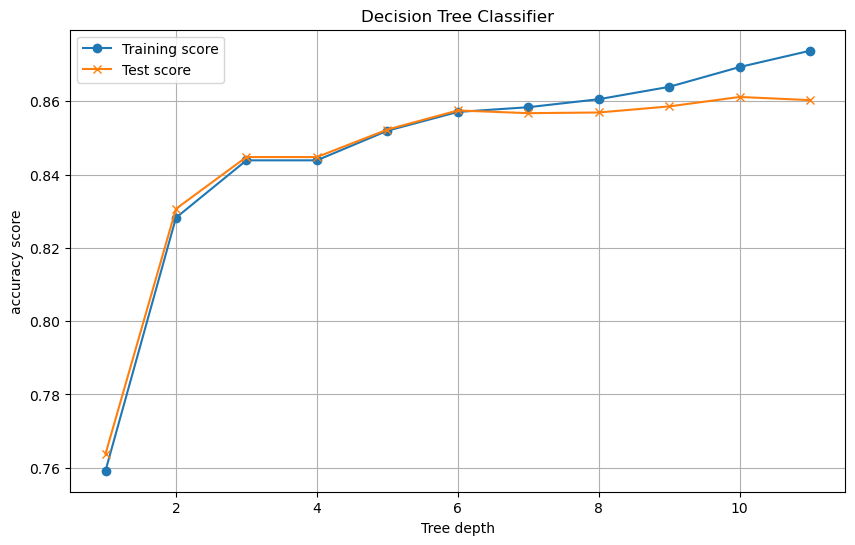

In [19]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def plot_learning_curves(X_train, Y_train, X_test, Y_test, max_depths):
    train_scores = []
    test_scores = []
    
    for depth in max_depths:
        reg = DecisionTreeClassifier(max_depth=depth)
        reg.fit(X_train, Y_train)
        train_scores.append(reg.score(X_train, Y_train))
        test_scores.append(reg.score(X_test, Y_test))
    
    plt.figure(figsize=(10, 6))
    plt.plot(max_depths, train_scores, label='Training score', marker='o')
    plt.plot(max_depths, test_scores, label='Test score', marker='x')
    plt.xlabel('Tree depth')
    plt.ylabel('accuracy score')
    plt.title('Decision Tree Classifier')
    plt.legend()
    plt.grid(True)
    plt.show()


train_data = pd.read_csv('Data/adult_train.csv')
test_data = pd.read_csv('Data/adult_test.csv')

n_cols = len(train_data.columns)
Xtrain_dicts = train_data.iloc[:, :n_cols-1].to_dict('records')
Ytrain = train_data.iloc[:, n_cols-1]


Xtest_dicts = test_data.iloc[:, :n_cols-1].to_dict('records')
Ytest = test_data.iloc[:, n_cols-1]

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(Xtrain_dicts)
X_test_encoded = dv.transform(Xtest_dicts)
X_train_df = pd.DataFrame(X_train_encoded.toarray(), columns=dv.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_encoded.toarray(), columns=dv.get_feature_names_out())


# print(f"num train: {len(X_train_encoded)}num test: {len(X_test_encoded)}")
plot_learning_curves(X_train_encoded, Ytrain, X_test_encoded, Ytest, range(1, 12))

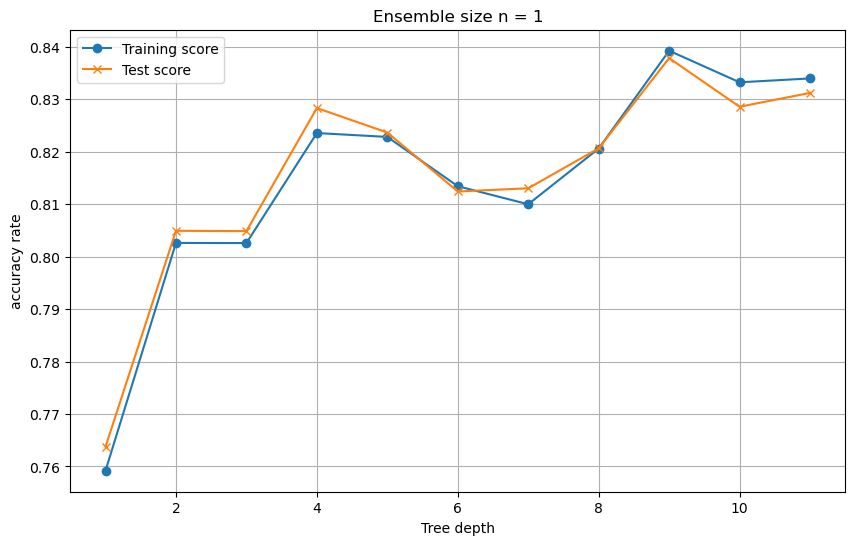

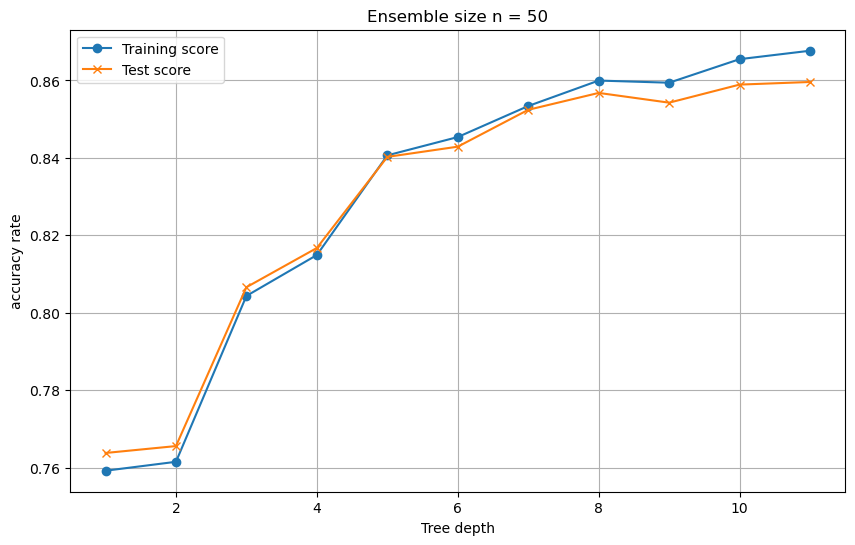

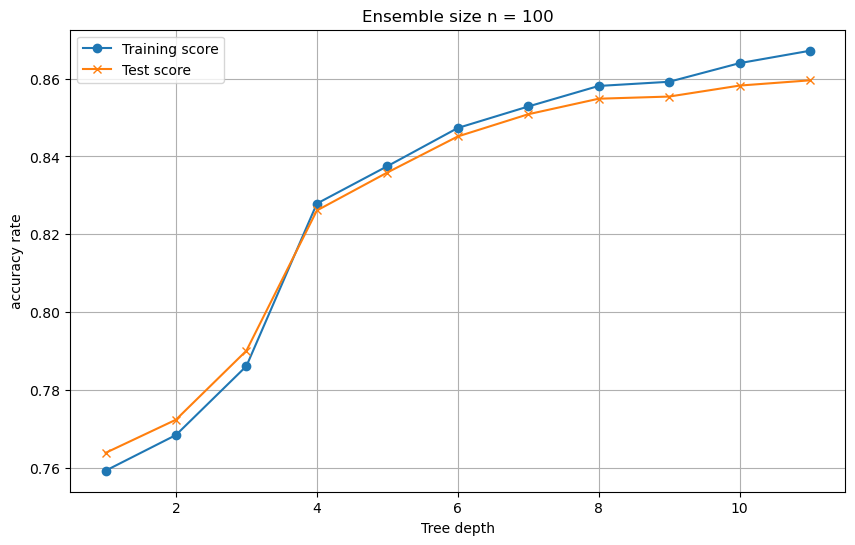

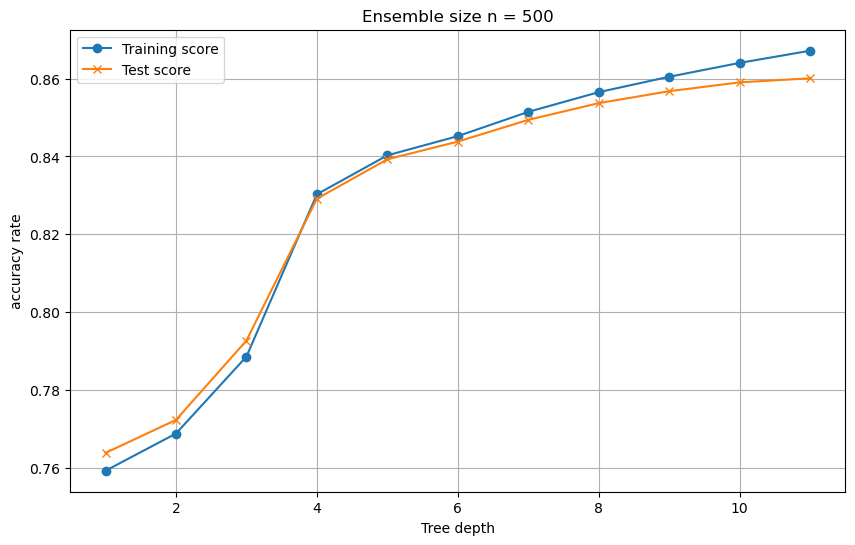

In [20]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

def plot_learning_curves(X_train, Y_train, X_test, Y_test, max_depths, n_estimators_list):
    for n in n_estimators_list:
        train_scores = []
        test_scores = []
        for depth in max_depths:
            reg = RandomForestClassifier(max_depth=depth, n_estimators = n, n_jobs = 4)
            reg.fit(X_train, Y_train)
            train_scores.append(reg.score(X_train, Y_train))
            test_scores.append(reg.score(X_test, Y_test))
        
        plt.figure(figsize=(10, 6))
        plt.plot(max_depths, train_scores, label='Training score', marker='o')
        plt.plot(max_depths, test_scores, label='Test score', marker='x')
        plt.xlabel('Tree depth')
        plt.ylabel('accuracy rate')
        plt.title(f'Ensemble size n = {n}')
        plt.legend()
        plt.grid(True)
        plt.show()


train_data = pd.read_csv('Data/adult_train.csv')
test_data = pd.read_csv('Data/adult_test.csv')

n_cols = len(train_data.columns)
Xtrain_dicts = train_data.iloc[:, :n_cols-1].to_dict('records')
Ytrain = train_data.iloc[:, n_cols-1]


Xtest_dicts = test_data.iloc[:, :n_cols-1].to_dict('records')
Ytest = test_data.iloc[:, n_cols-1]

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(Xtrain_dicts)
X_test_encoded = dv.transform(Xtest_dicts)
X_train_df = pd.DataFrame(X_train_encoded.toarray(), columns=dv.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_encoded.toarray(), columns=dv.get_feature_names_out())


# print(f"num train: {len(X_train_encoded)}num test: {len(X_test_encoded)}")
plot_learning_curves(X_train_encoded, Ytrain, X_test_encoded, Ytest, range(1, 12), [1, 50, 100, 500])

## Analysis
- Decision Tree has curve more closely representing a logarithmic function whereas the random forest with ensemble size = 1 is much more chaotic. The chaotic random forest graph is likely due to the fact that a random subset of features is taken and bootstrapping. 
- Random forest curves more closely approximate curves found for decision trees as the ensemble size grows
- the accuracy generally increases with larger ensemble sizes
- training time generally grows with larger ensemble sizes


# Task 3

## Evaluation
As we can see, the precision is not ideal. Especially for '>50K'.  
Potential reason could be the amount of sample of '<=50K' is way larger than '>50K''s.

In [59]:
from sklearn.metrics import classification_report

# Build pipeline: DictVectorizer + RandomForest
pipeline = Pipeline([
    ('vec', DictVectorizer(sparse=False)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Train the model
pipeline.fit(Xtrain_dicts, Ytrain)
# Evaluate
y_pred = pipeline.predict(Xtest_dicts)
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88     12435
        >50K       0.62      0.60      0.61      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.74      0.75     16281
weighted avg       0.82      0.82      0.82     16281



We tried another classifier—RandomForestClassifier.  
There's some improvement on '>50K'. 

In [57]:
from sklearn.metrics import classification_report

# Build pipeline: DictVectorizer + RandomForest
pipeline = Pipeline([
    ('vec', DictVectorizer(sparse=False)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(Xtrain_dicts, Ytrain)
# Evaluate
y_pred = pipeline.predict(Xtest_dicts)
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     12435
        >50K       0.70      0.61      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.79      0.77      0.78     16281
weighted avg       0.84      0.85      0.84     16281



To better understand the performance of the model, let's take a look at the importance of the features.  


In [34]:
import numpy as np

# Access vectorizer and classifier from pipeline
vec = pipeline.steps[0][1]
clf = pipeline.steps[1][1]

# Get feature names and their importance scores
feature_names = vec.feature_names_
importances = clf.feature_importances_

# Sort by importance (descending)
indices = np.argsort(importances)[::-1]

# Display top features
print("Top 10 features by importance:")
for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


Top 10 features by importance:
age: 0.2258
hours-per-week: 0.1153
capital-gain: 0.1107
education-num: 0.0613
marital-status=Married-civ-spouse: 0.0594
relationship=Husband: 0.0478
capital-loss: 0.0350
marital-status=Never-married: 0.0272
occupation=Exec-managerial: 0.0203
occupation=Prof-specialty: 0.0175


## Analysis 
**Top 3:**  

**Age**
- Age obviously corresponds with working experience, education status, etc.
- Older individuals are more likely to earn more — until a certain point.
- Since it's continuous and has a wide range, it's often split multiple times in decision trees.
  
**Hours per week**
- Hours per week directly affects income. Usually, the longer a person works a week, the more they earn.
- - It's a strong signal that helps the tree to split.
  
**Capital gain**
- Capital gain is also a strong indicator because most people don't have this. However, if one person has capital gain, they are more likely to be a high-income individual.
- It's a strong signal that helps the tree to split.

**Alternative Way to Compute Importance Features**

Feature importances are computed using the gini impurity metric while training. Features on which we can split that provide the best gini impurity score are ranked as the most important. The issue with this approach is that features that have many unique values are typically ranked as more important. In addition, the results from a "common-sense" perspective sometimes don't make sense.

An alternative approach would be to use permutation shuffling. In this approach, we would have a trained model and a validation data set. Also, we would have a score assigned to the trained data set against the validation model. Then, we would choose some feature column within the validation set, and shuffle (randomly permute) the data within the column and used the shuffled column to measure the score difference in trained data set against the validation set.The idea here is that more important features would lead to larger decreases in the score of the shuffled validation data set against the regular validation set. We can use these differences to rank the importance of features.

Permutation shuffling can overcome some of the issues with unique values. 